In [1]:
import numpy as np
import proplot
import xarray as xr

import plotting

In [2]:
plotting.configure_style()

In [10]:
all_climate_r2 = xr.open_zarr("offline-r2-all-climates.zarr")
all_climate_r2 = all_climate_r2.assign_coords(pressure=all_climate_r2.pressure / 100)

In [11]:
def plot_seed(ds, seed, filename=None):
    fig, (ax1, ax2) = proplot.subplots(nrows=1, ncols=2, refaspect=1/0.618, figwidth=6.5)

    p = ds.sel(seed=seed).dQ1.plot.contourf(ax=ax1, vmin=0, vmax=0.3, x="lat", y="pressure", yincrease=False, add_colorbar=False, levels=11)
    p = ds.sel(seed=seed).dQ2.plot.contourf(ax=ax2, vmin=0, vmax=0.3, x="lat", y="pressure", yincrease=False, add_colorbar=False, levels=11)
    ax1.set_title("$R^2$ for offline prediction of $\Delta Q_T$")
    ax2.set_title("$R^2$ for offline prediction of $\Delta Q_q$")

    for ax in [ax1, ax2]:
        ax.set_xticks(np.array([-90, -60, -30, 0, 30, 60, 90]))
        ax.set_xticklabels([u"90°S", u"60°S", u"30°S", u"EQ", u"30°N", u"60°N", u"90°N"])
        ax.set_xlabel("")
        ax.set_ylabel("Pressure [hPa]")

    ax1.annotate(f"(a)", xy=(0, 1), xytext=(2, -2), va="top", xycoords="axes fraction", textcoords="offset points", color="white")
    ax2.annotate(f"(b)", xy=(0, 1), xytext=(2, -2), va="top", xycoords="axes fraction", textcoords="offset points", color="white")

    fig.colorbar(p, loc="bottom", width=0.125, label=f"$R^2$ over test data in all climates for seed {seed} neural network")
    if filename is not None:
        fig.savefig(f"{filename}.png", dpi=200)
        fig.savefig(f"{filename}.pdf")

/home/spencerc/miniconda3/envs/fv3net-makefile/lib/python3.8/site-packages/xarray/plot/plot.py:1426: ProplotWarning: Ignoring levels=[0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3 ]. Instead using norm=<matplotlib.colors.BoundaryNorm object at 0x7f9f7fa8abe0> boundaries.
  primitive = ax.contourf(x, y, z, **kwargs)
/home/spencerc/miniconda3/envs/fv3net-makefile/lib/python3.8/site-packages/xarray/plot/plot.py:1426: ProplotWarning: Ignoring levels=[0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3 ]. Instead using norm=<matplotlib.colors.BoundaryNorm object at 0x7f9f7fce2d60> boundaries.
  primitive = ax.contourf(x, y, z, **kwargs)


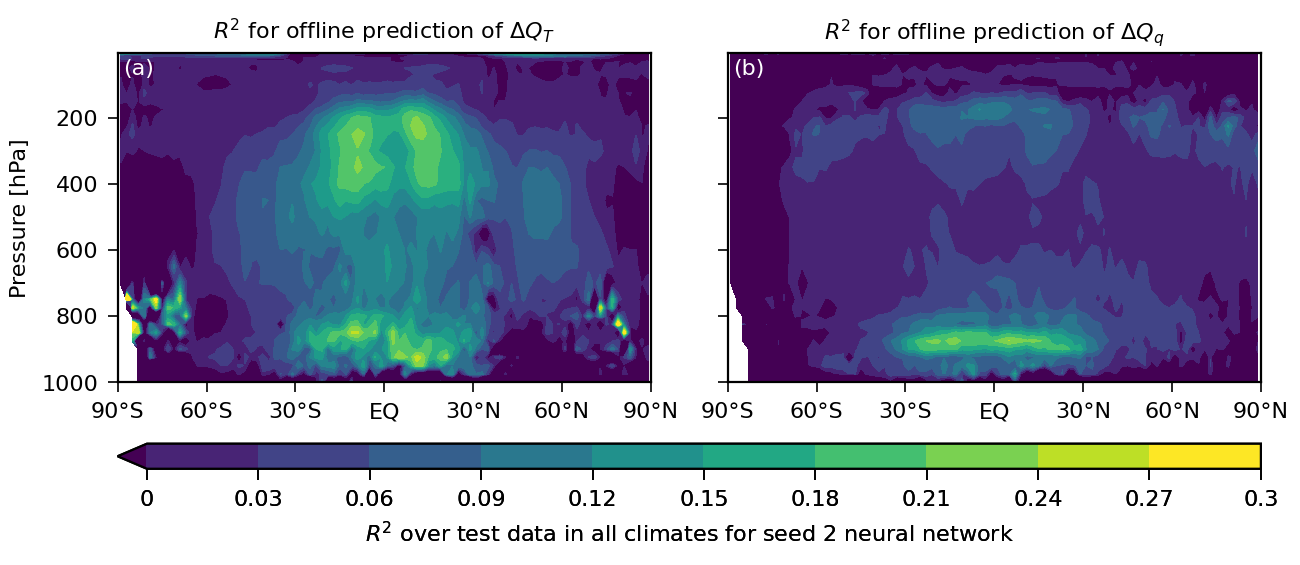

In [12]:
plot_seed(all_climate_r2, 2, "figures/figure-06")

/home/spencerc/miniconda3/envs/fv3net-makefile/lib/python3.8/site-packages/xarray/plot/plot.py:1426: ProplotWarning: Ignoring levels=[0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3 ]. Instead using norm=<matplotlib.colors.BoundaryNorm object at 0x7f9f80333f10> boundaries.
  primitive = ax.contourf(x, y, z, **kwargs)
/home/spencerc/miniconda3/envs/fv3net-makefile/lib/python3.8/site-packages/xarray/plot/plot.py:1426: ProplotWarning: Ignoring levels=[0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3 ]. Instead using norm=<matplotlib.colors.BoundaryNorm object at 0x7f9f6eec7f40> boundaries.
  primitive = ax.contourf(x, y, z, **kwargs)
/home/spencerc/miniconda3/envs/fv3net-makefile/lib/python3.8/site-packages/xarray/plot/plot.py:1426: ProplotWarning: Ignoring levels=[0.   0.03 0.06 0.09 0.12 0.15 0.18 0.21 0.24 0.27 0.3 ]. Instead using norm=<matplotlib.colors.BoundaryNorm object at 0x7f9f6ecfedc0> boundaries.
  primitive = ax.contourf(x, y, z, **kwargs)
/home/spencerc/miniconda3

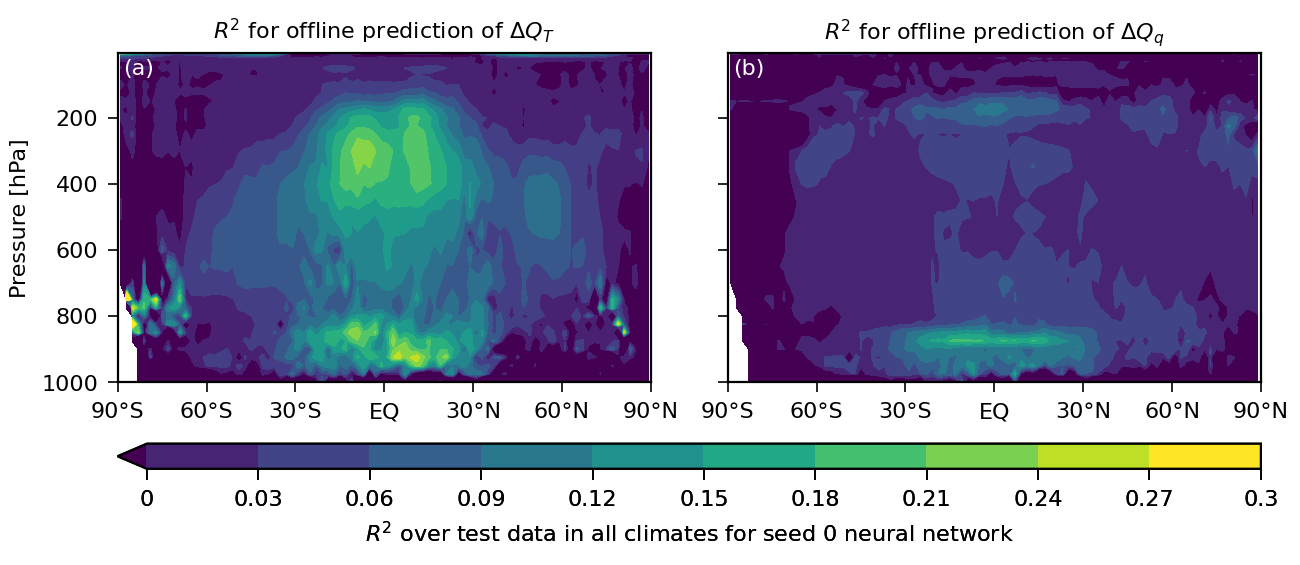

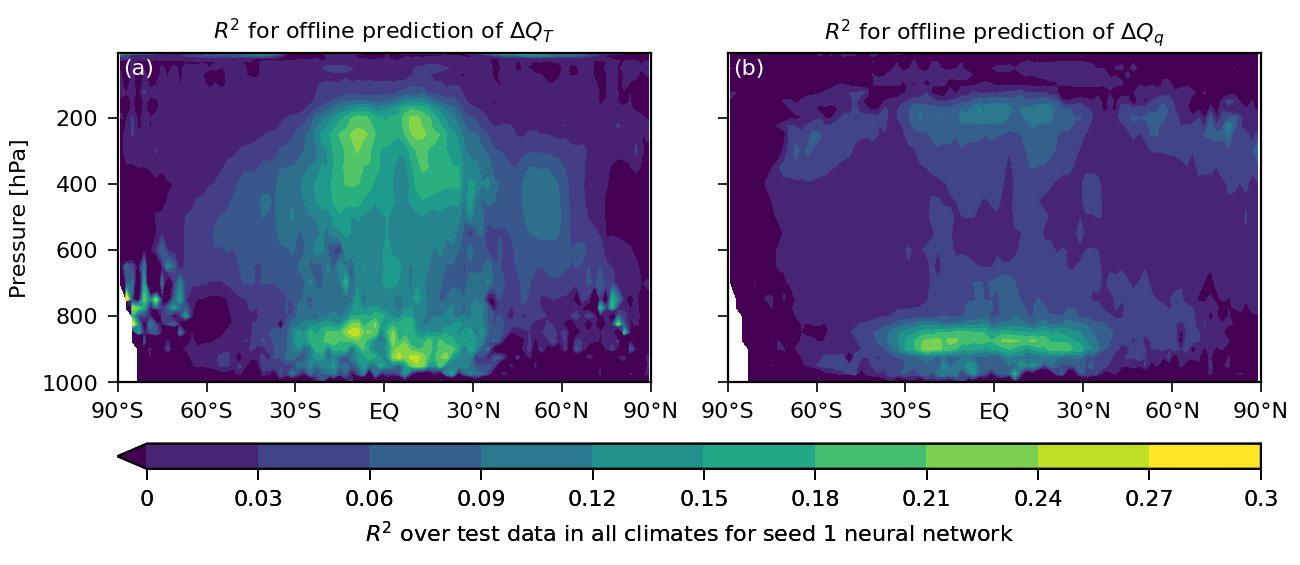

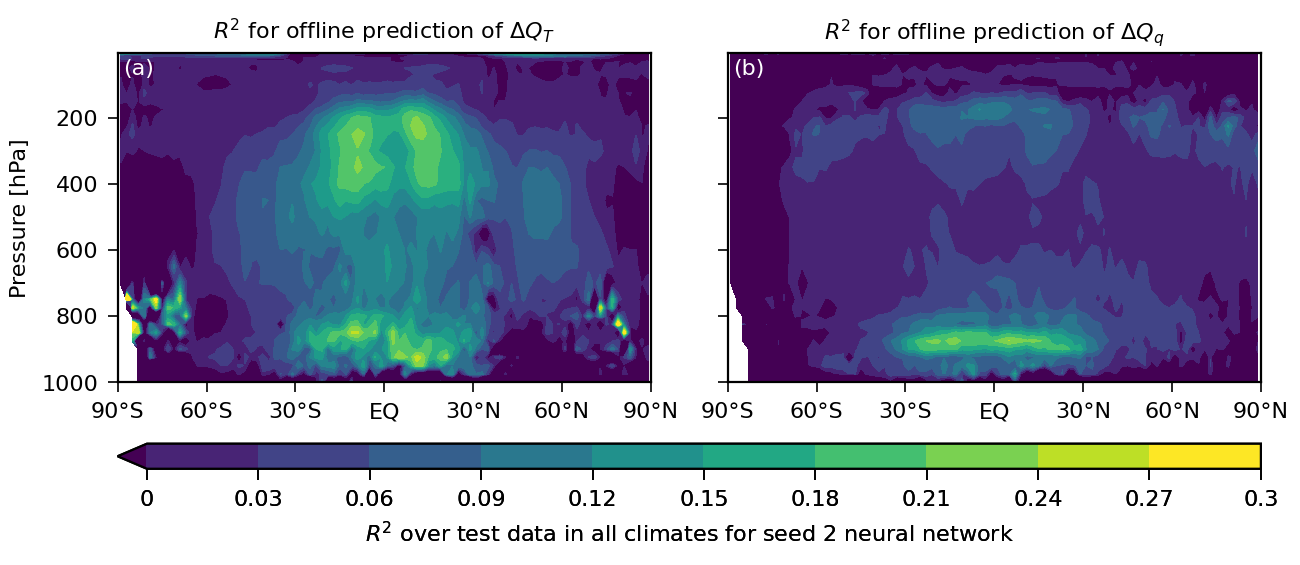

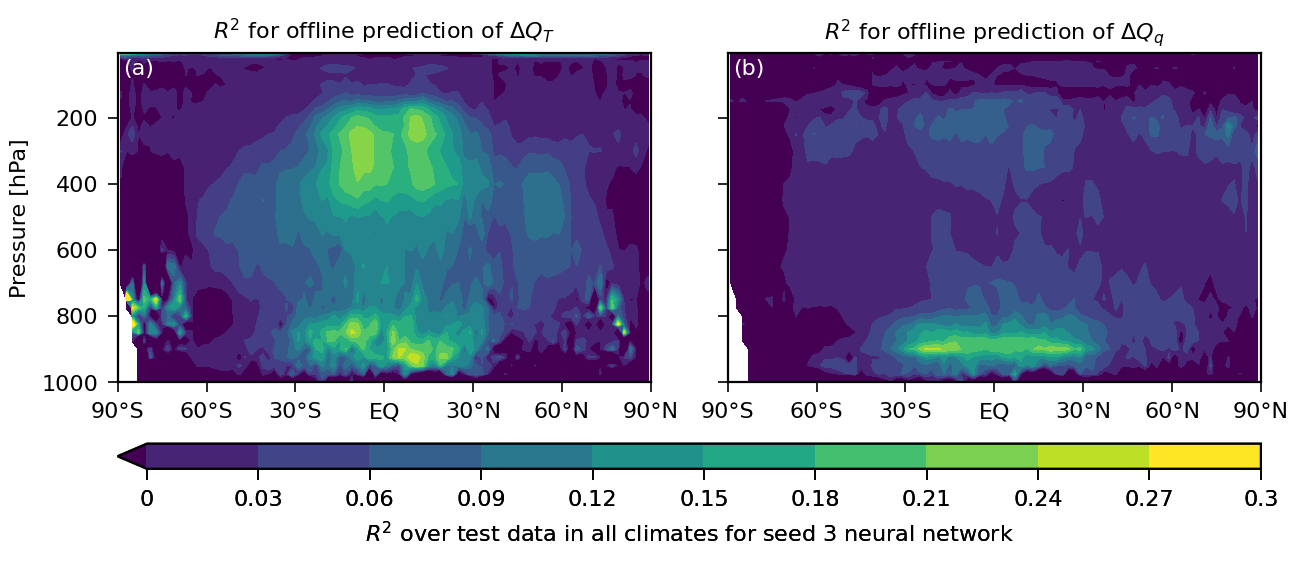

In [13]:
for i in range(4):
    plot_seed(all_climate_r2, i)

In [7]:
per_climate_r2 = xr.open_zarr("offline-r2-per-climate.zarr")

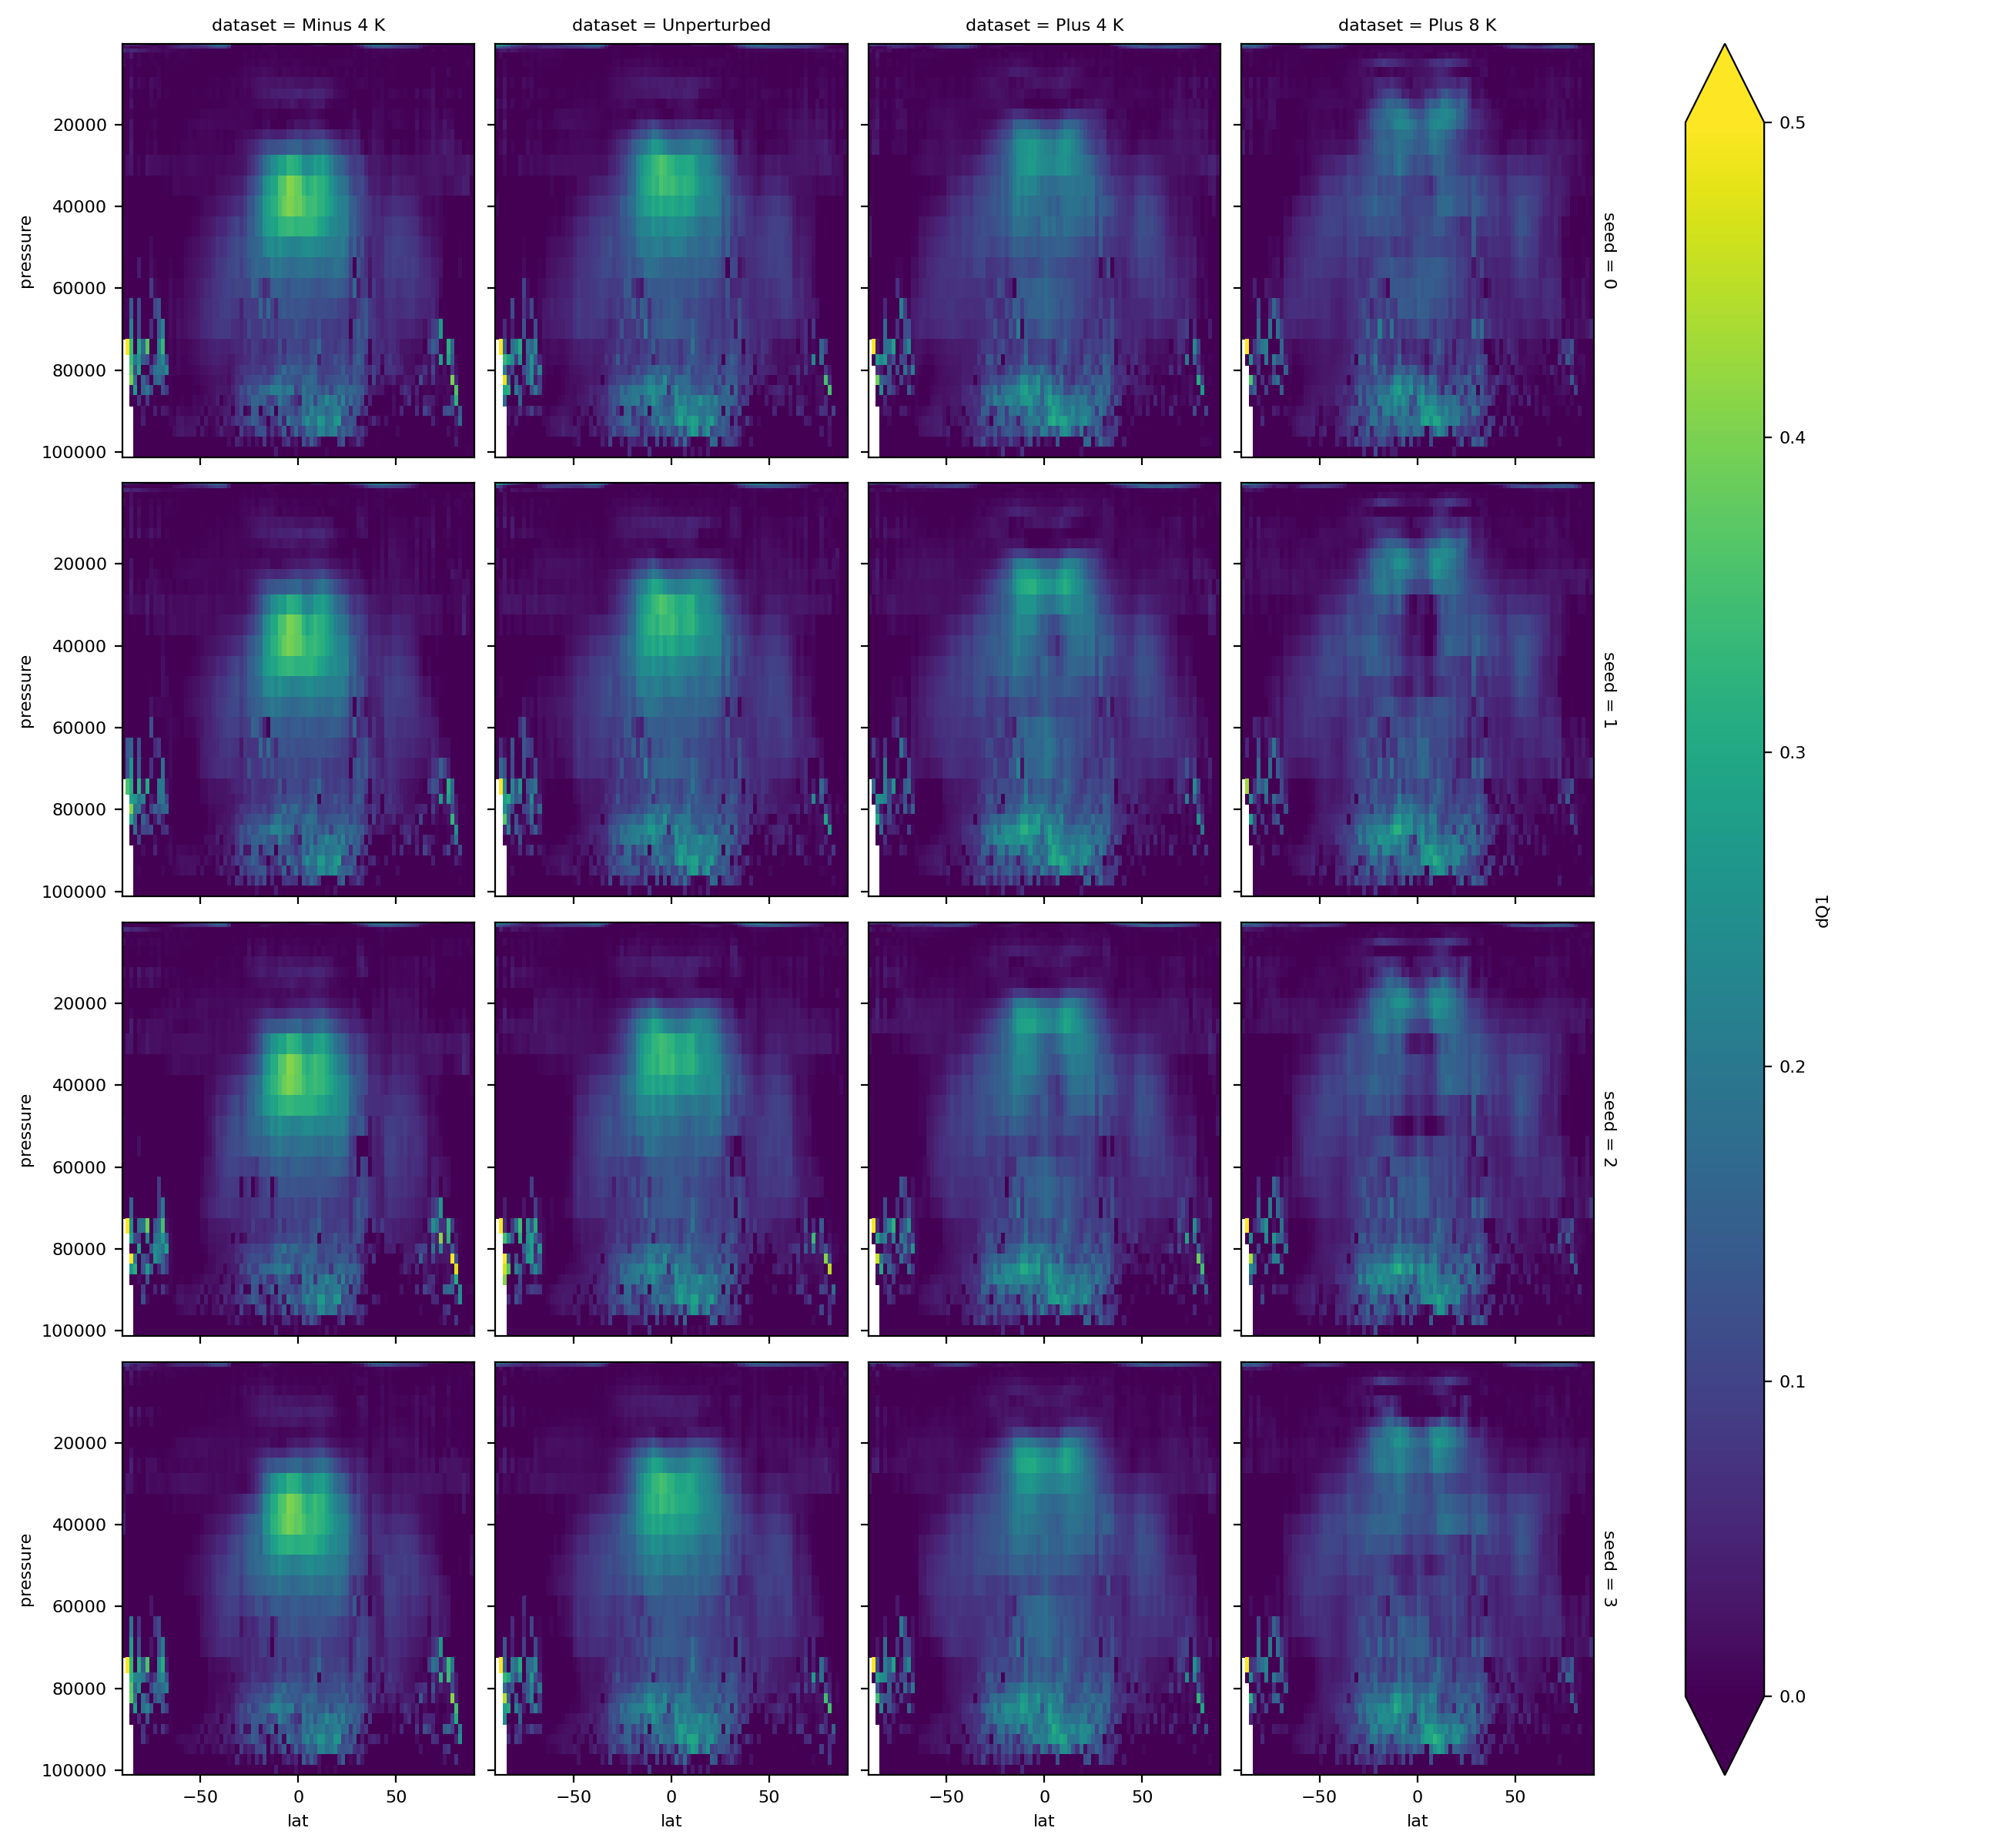

In [8]:
per_climate_r2.dQ1.plot(col="dataset", row="seed", x="lat", y="pressure", yincrease=False, vmin=0, vmax=0.5)

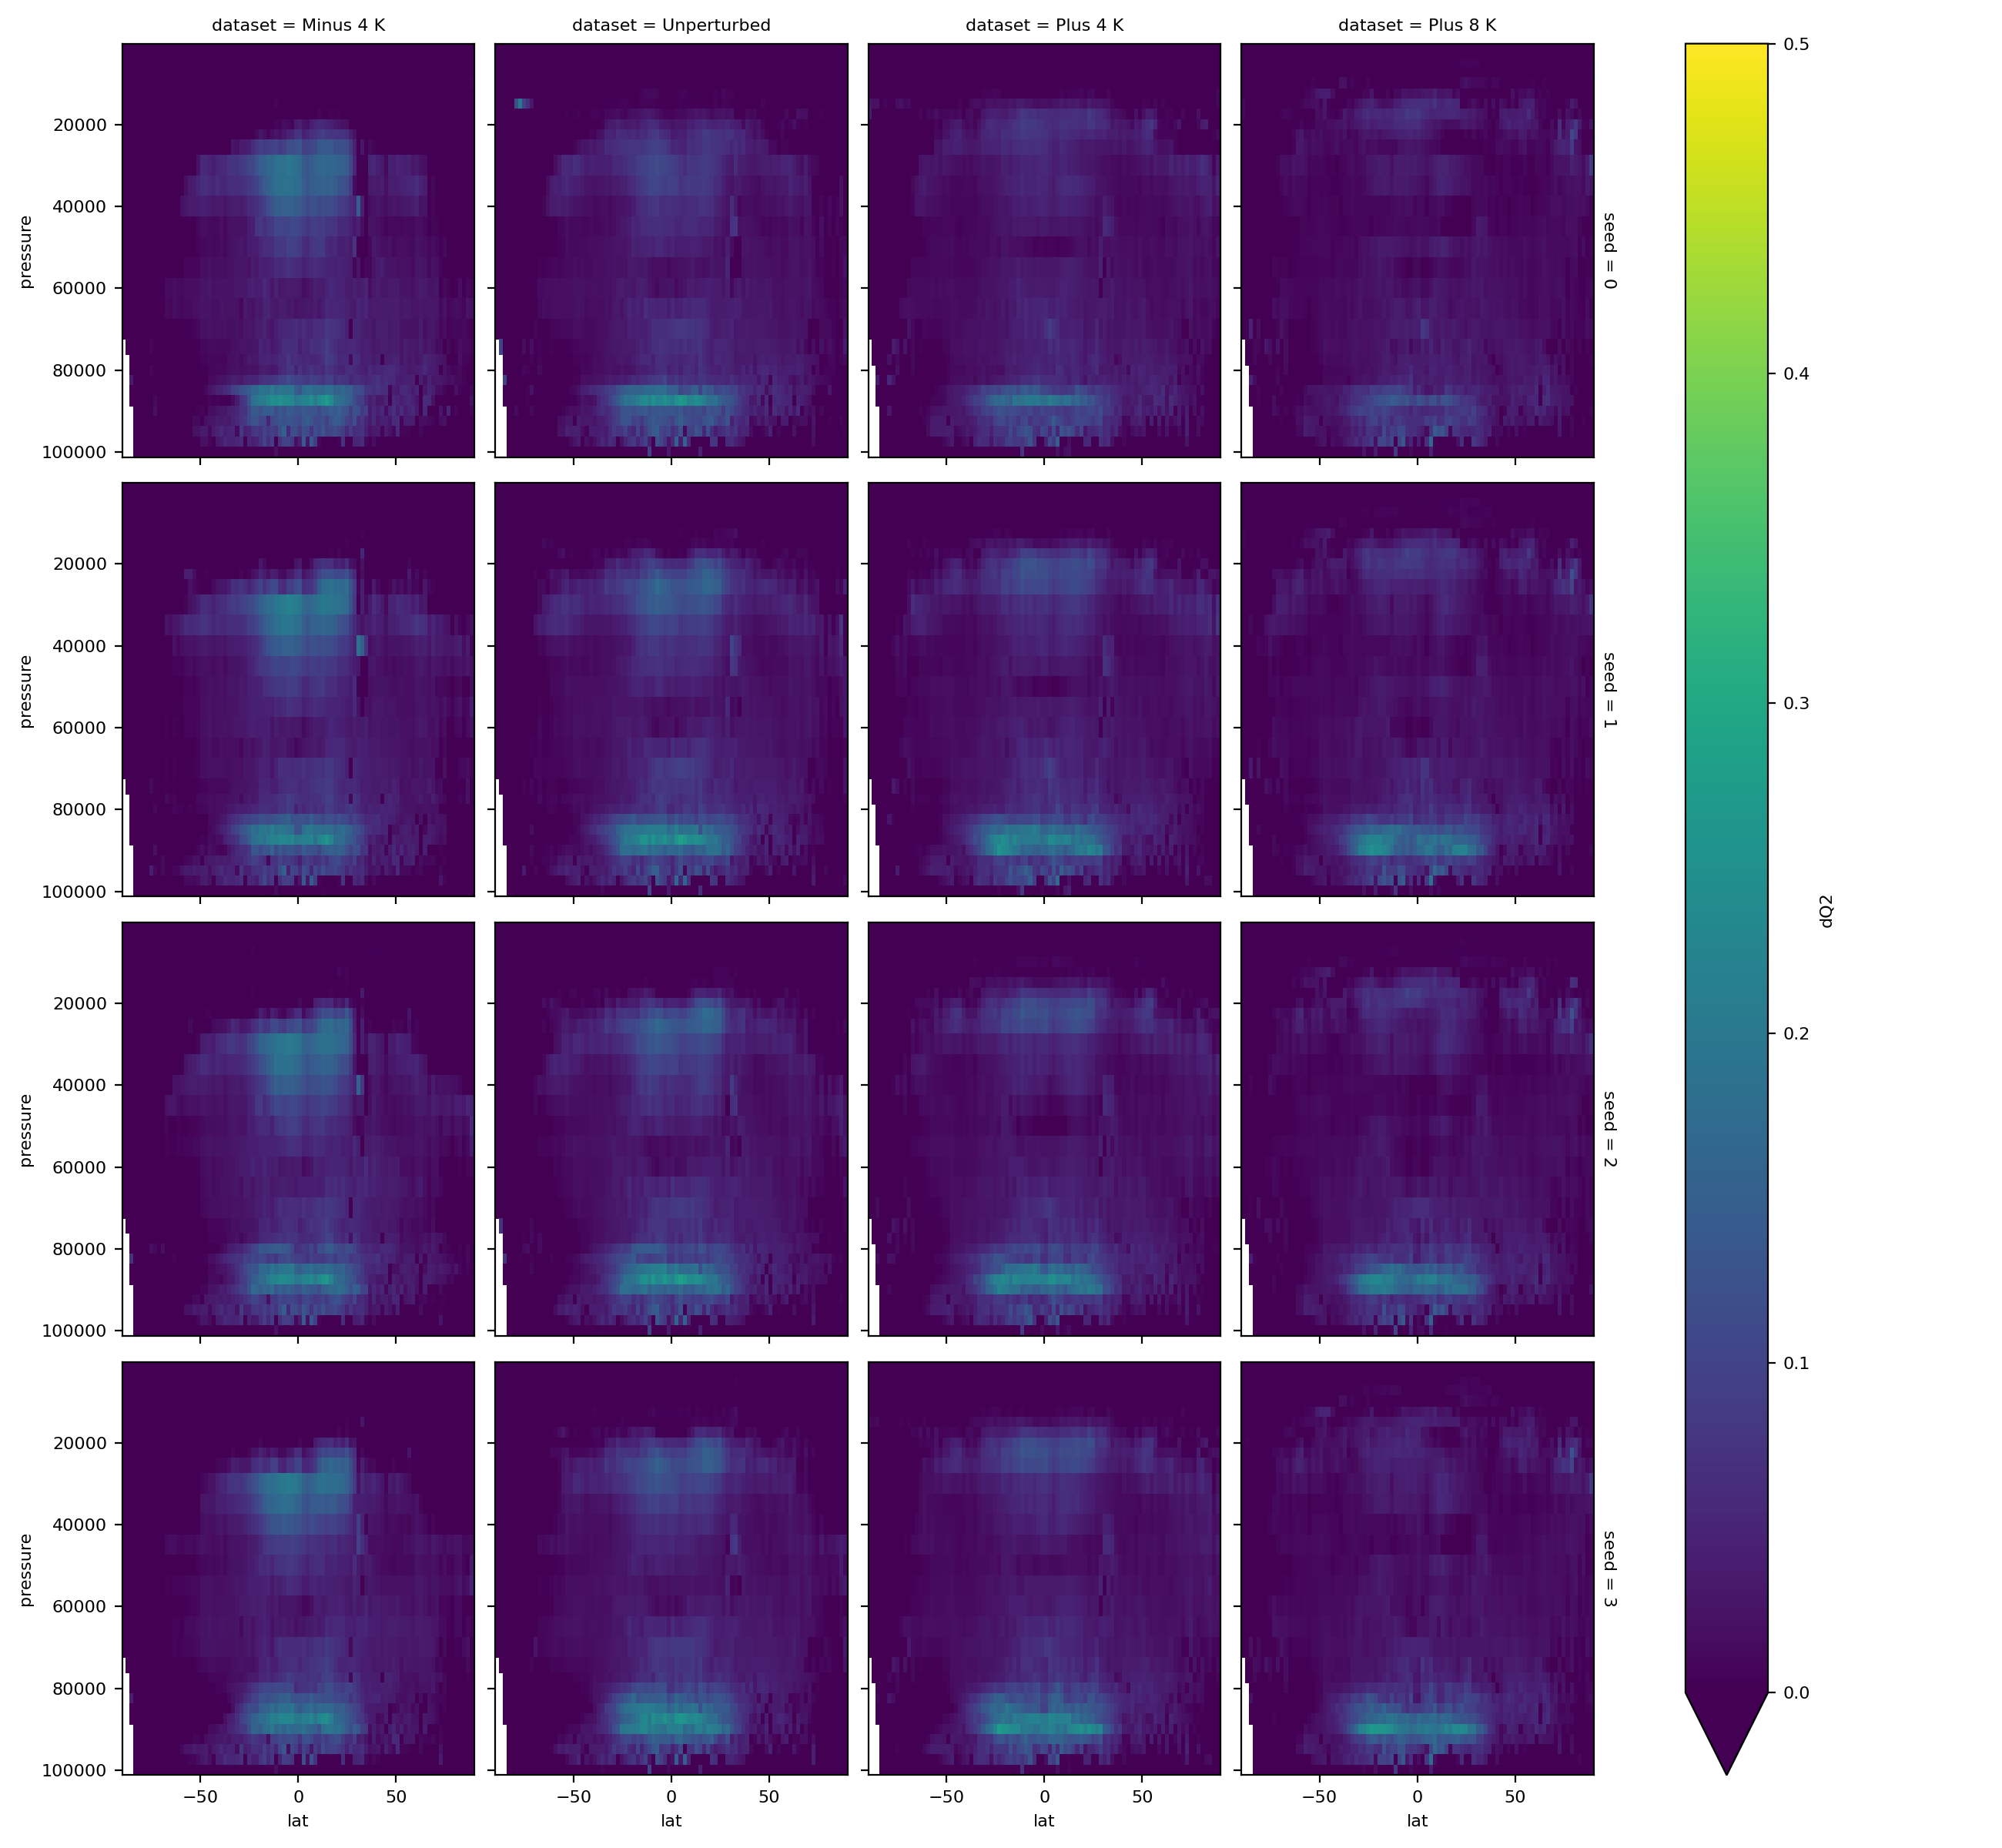

In [9]:
per_climate_r2.dQ2.plot(col="dataset", row="seed", x="lat", y="pressure", yincrease=False, vmin=0, vmax=0.5)